### TASK1


## Prediction using Supervised ML

IN this task we will predict the percentage of marks that a student is expected to score based on the hours they dedicate to study.

In [2]:
# Importing all libraries required in this notebook
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt  
%matplotlib inline
import pandas as pd
import numpy as np 

### Importing DAta set

In [13]:
#importing data
url =r"https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
s_data = pd.read_csv(url)
print("Data imported successfully")
s_data.head(15)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

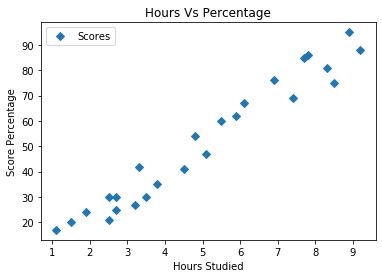

In [16]:
#plotting the distribution of scores
s_data.plot(x='Hours', y='Scores', style='D')
plt.title('Hours Vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Score Percentage')
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [17]:
x = s_data.iloc[:,:-1].values
y = s_data.iloc[:,-1].values

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [24]:
x_train, x_test, y_train,y_test = train_test_split(x,y,
test_size=0.2, random_state=0)
regressor= LinearRegression()
regressor.fit(x_train, y_train)
print("Training Complete")



Training Complete


## Plotting the regression line

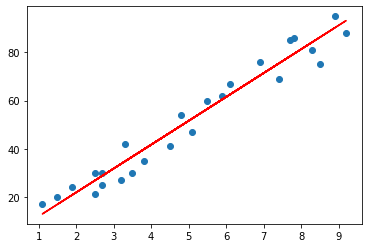

In [27]:
#Plotting the regression line
line= regressor.coef_*x+regressor.intercept_

#Plotting for the test data
plt.scatter(x,y)
plt.plot(x, line, color = 'Red');
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [29]:
#testing data _ in Hours
print(x_test)
#Predictinf the scores
y_pred = regressor.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [38]:
#Comparing Actual Vs Predicted
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [39]:
#Estimating the train and test score
print("Train Score:", regressor.score(x_train, y_train))
print("Test Score:",regressor.score(x_test, y_test))

Train Score: 0.9515510725211553
Test Score: 0.9454906892105356


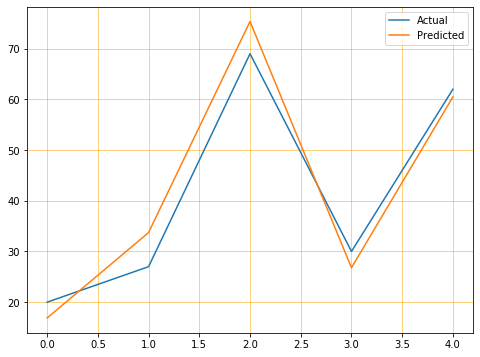

In [40]:
#plotting the line graph to depict the difference between the actual and predicted value
df.plot(kind='line',figsize=(8,6))
plt.grid(which='major',linewidth='0.5',color='red')
plt.grid(which='major',linewidth='0.5',color='orange')
plt.show()

In [41]:
#test with random  data
hours = 9.25
test= np.array([hours])
test=test.reshape(-1,1)
own_predi=regressor.predict(test)
print("Number of hours={}".format(hours))
print("Predicted Score={}".format(own_predi[0]))

Number of hours=9.25
Predicted Score=93.69173248737538



### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [43]:
from sklearn import metrics
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_pred))
print("Mean squared Error:",metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('r-2',metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 4.183859899002975
Mean squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
r-2 0.9454906892105356


## CONCLUSION

r-2 gives the score of model fit and in this case we have r-2:0.9454906892105356 which is actually a middle score for this model.